# California Housing Price Predictor
---


1.	**Data Loading and Splitting**: The dataset is loaded and split into training and testing sets to ensure a clean separation of data for model evaluation.

2.	**Exploratory Data Analysis (EDA)**: EDA is performed on the training set to understand the data distribution and relationships between features.

3.	**Data Preprocessing**: Key preprocessing steps include handling skewed features through logarithmic transformations and encoding categorical variables.

4.	**Feature Engineering**: New features are created to enhance the model’s predictive power.
	
5.	**Model Training and Evaluation**: Two models are trained and evaluated - a Linear Regression model.

## Import Libaries
---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading 
---

In [4]:
data = pd.read_csv("housing.csv")
data.shape

(20640, 10)

## Data: First Look
---

In [5]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- We can see that that in the column 'total_bedrooms', there is about 200 null-value data points. 

- We can either impute them with the median or drop the rows. Either approach would work for our task.

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Split the data set into train and test sets

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

train_data = X_train.join(y_train)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6555,-118.10,34.18,39.0,2321.0,336.0,880.0,339.0,7.7108,INLAND,450000.0
7906,-118.10,33.86,21.0,3052.0,624.0,1588.0,568.0,4.3397,<1H OCEAN,268100.0
3145,-118.15,35.04,29.0,1671.0,368.0,821.0,337.0,2.1600,INLAND,56800.0
15499,-117.25,33.10,14.0,3676.0,720.0,1176.0,614.0,3.9464,NEAR OCEAN,171900.0
16480,-121.28,38.17,19.0,1337.0,236.0,744.0,225.0,4.0924,INLAND,244200.0
...,...,...,...,...,...,...,...,...,...,...
17084,-122.20,37.47,37.0,1403.0,369.0,1587.0,331.0,2.8258,NEAR BAY,232800.0
12340,-116.53,33.85,16.0,10077.0,2186.0,3048.0,1337.0,2.9647,INLAND,110900.0
11042,-117.82,33.81,19.0,2556.0,304.0,822.0,260.0,9.9055,<1H OCEAN,456900.0
71,-122.29,37.81,46.0,935.0,297.0,582.0,277.0,0.7286,NEAR BAY,95200.0


## Exploratory Data Analysis (EDA)

### Visualizing Data Distribution


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

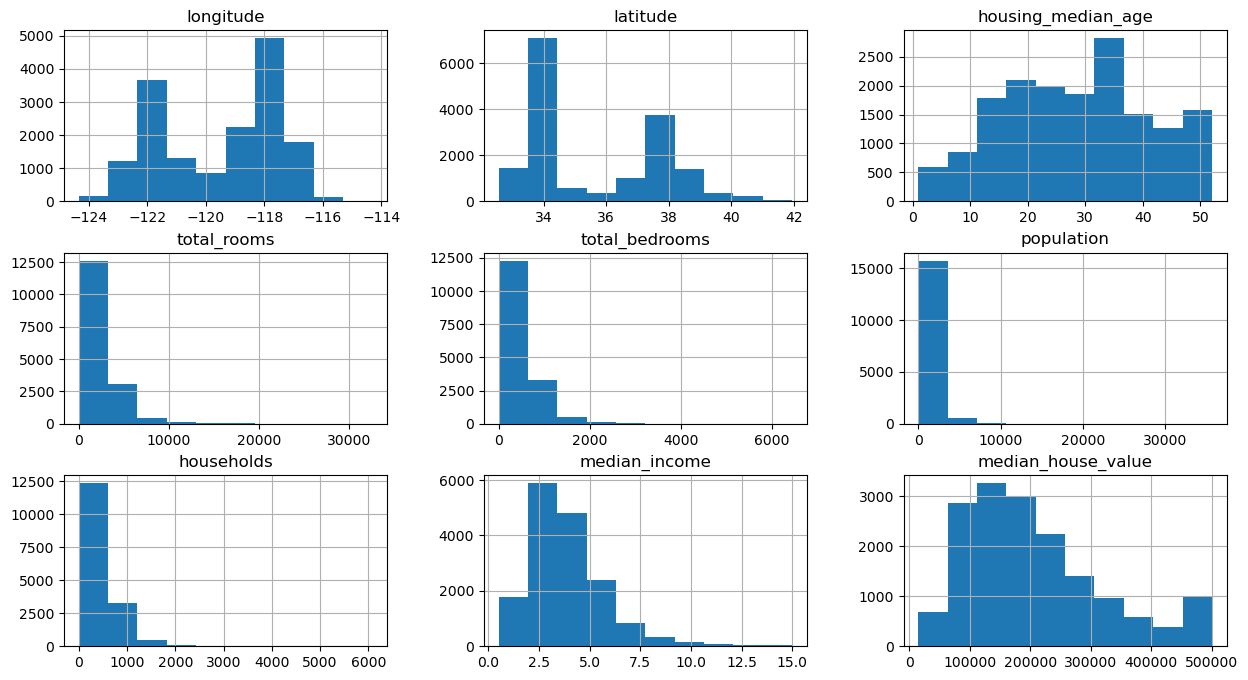

In [11]:
train_data.hist(figsize=(15,8))

### Correlation Matrix

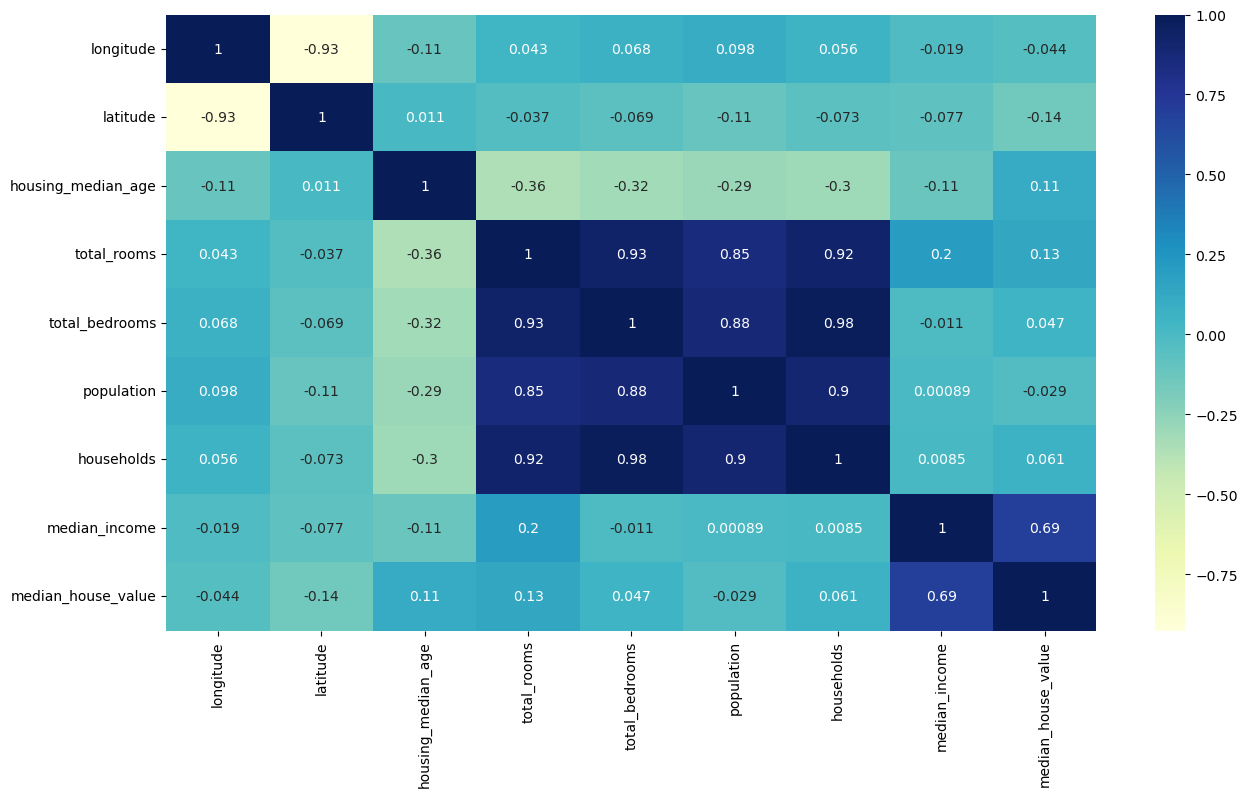

In [12]:
temp_train_data = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(temp_train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Data Preprocessing

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

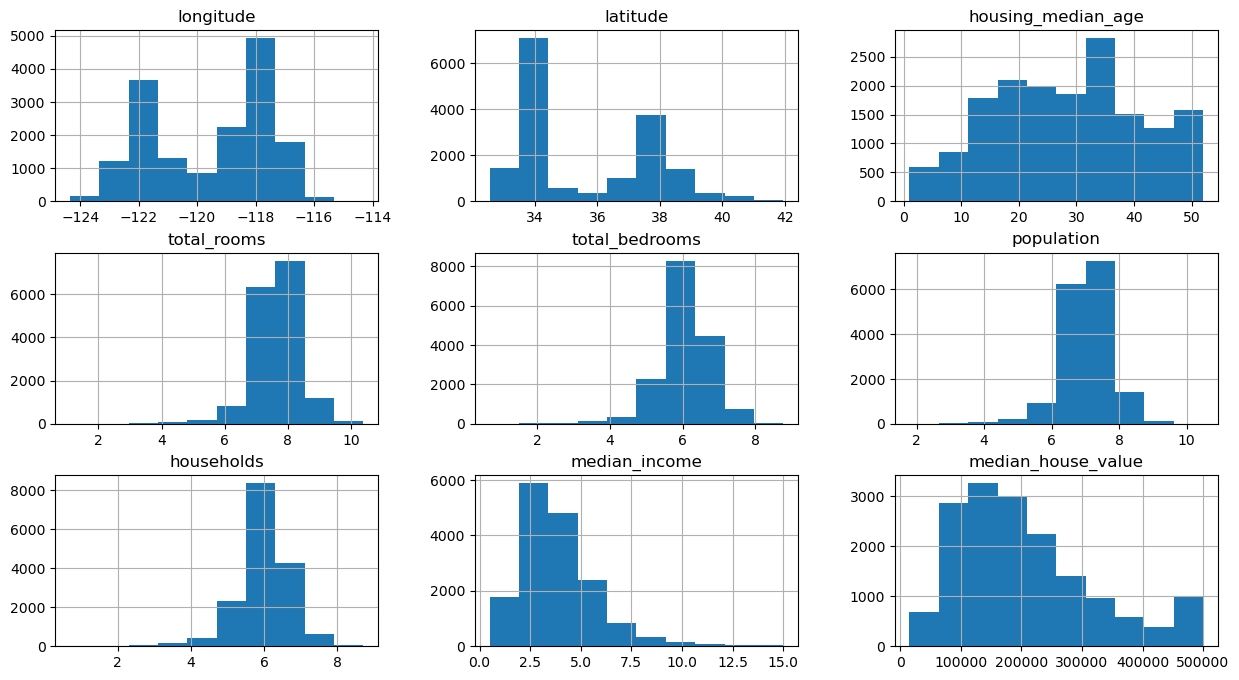

In [14]:
train_data.hist(figsize=(15,8))
plt.show()

### Encoding Categorical Features

In [15]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7274
INLAND        5135
NEAR OCEAN    2107
NEAR BAY      1828
ISLAND           2
Name: ocean_proximity, dtype: int64

In [16]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6555,-118.10,34.18,39.0,7.750184,5.820083,6.781058,5.828946,7.7108,450000.0,0,1,0,0,0
7906,-118.10,33.86,21.0,8.023880,6.437752,7.370860,6.343880,4.3397,268100.0,1,0,0,0,0
3145,-118.15,35.04,29.0,7.421776,5.910797,6.711740,5.823046,2.1600,56800.0,0,1,0,0,0
15499,-117.25,33.10,14.0,8.209852,6.580639,7.070724,6.421622,3.9464,171900.0,0,0,0,0,1
16480,-121.28,38.17,19.0,7.198931,5.468060,6.613384,5.420535,4.0924,244200.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17084,-122.20,37.47,37.0,7.247081,5.913503,7.370231,5.805135,2.8258,232800.0,0,0,0,1,0
12340,-116.53,33.85,16.0,9.218110,7.690286,8.022569,7.198931,2.9647,110900.0,0,1,0,0,0
11042,-117.82,33.81,19.0,7.846590,5.720312,6.712956,5.564520,9.9055,456900.0,1,0,0,0,0
71,-122.29,37.81,46.0,6.841615,5.697093,6.368187,5.627621,0.7286,95200.0,0,0,0,1,0


### Updated Correlation Matrix

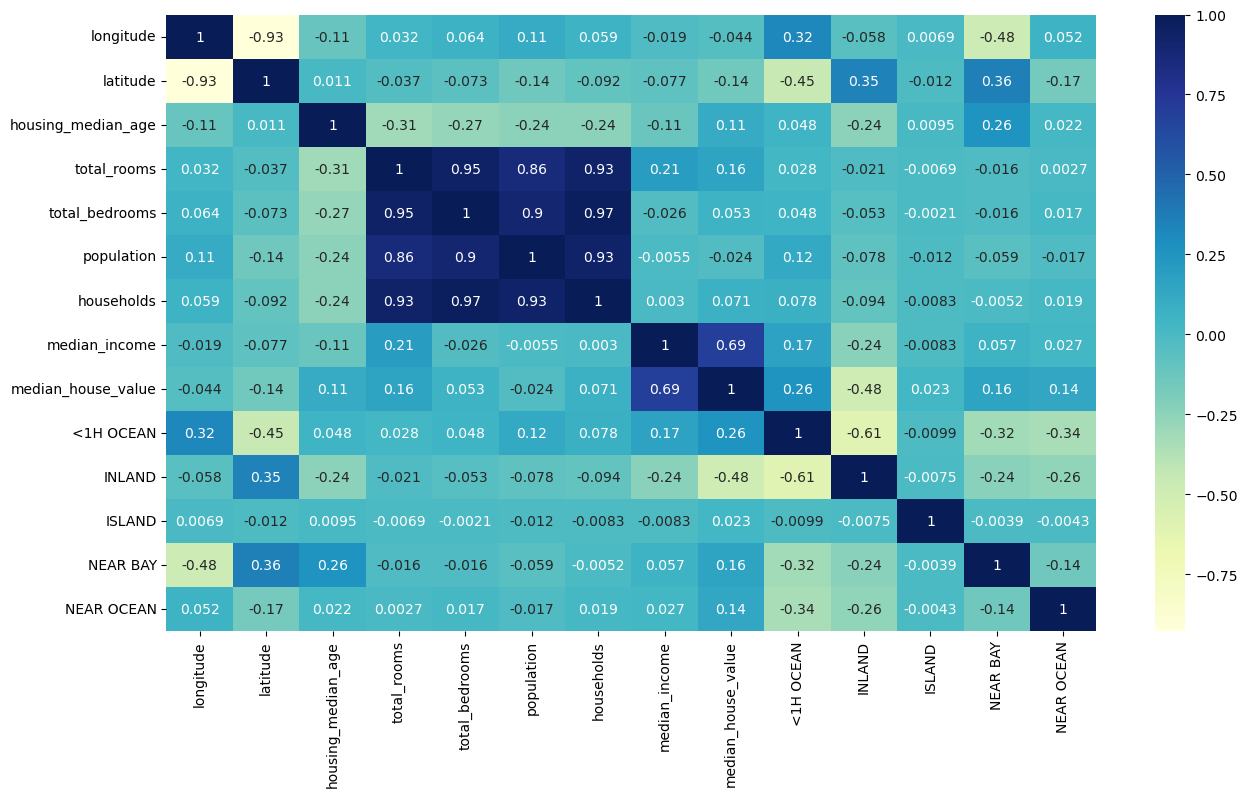

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

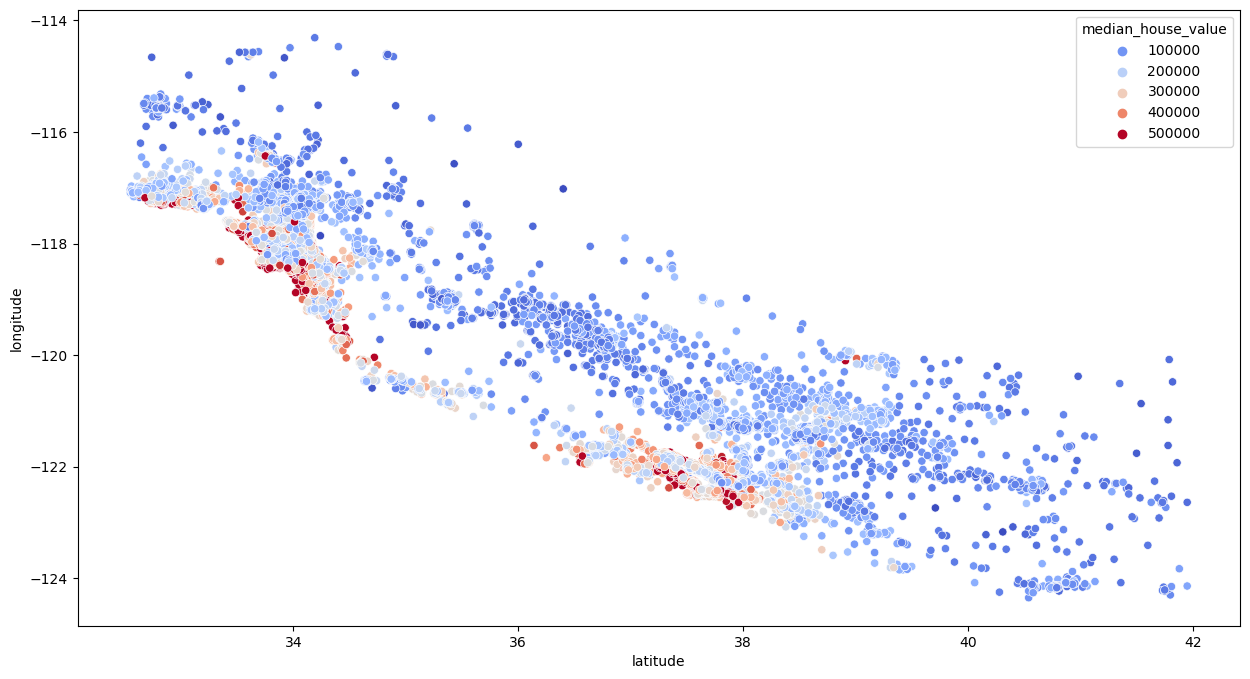

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

## Feature Engineering
household_rooms and bedroom_ratio

In [20]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

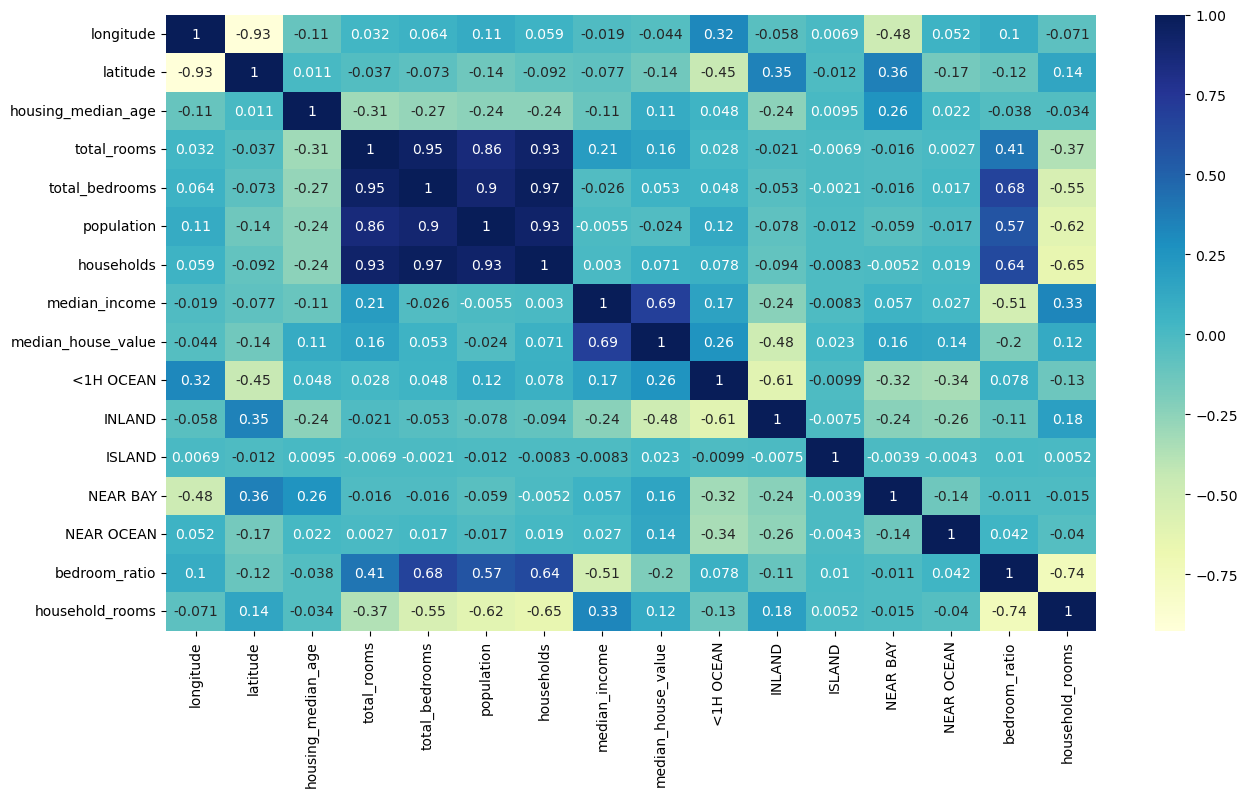

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Model: Linear Regression

### Scaling the Features
- StandardScaler.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)




### Training the Model

In [23]:
reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

### Preparing Test Data

In [24]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


### Evaluating Linear Regression

In [25]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
X_test_s = scaler.transform(X_test)

reg.score(X_test_s, y_test)

0.6657564926318895

In [26]:
import pickle
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(reg, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

### UI created using Bokeh for prediction in the same directory with name app.py

## Conclusion
--- 

1.	**Data Preprocessing**:
	-	Essential for normalizing skewed distributions and encoding categorical variables.
	-	Improved the suitability of the data for linear models.

2.	**Feature Engineering**:
	-	Creating new features like bedroom_ratio and household_rooms added valuable information, enhancing model performance.

3.	**Model Evaluation**:
	-	Splitting data before EDA and preprocessing prevented data leakage, ensuring unbiased evaluation.
	-	Linear Regression provided a baseline.

4.	**Exploratory Data Analysis (EDA)**:
	-	Guided feature selection and engineering through understanding feature-target relationships.
	-	Data visualization revealed underlying data patterns.
	
5.	**Model Performance**:
	-	Linear Regression was simple but limited.